In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis and Sumary Metrics

Most of the visualizations have been done in Python . There are few that have been done in Tableau. The snapshots of the tableau visualizations are present in this notebook and the Tableau files are present in the respective Tableau Folder.

## Reading All the Csv into dataframes

In [2]:
# Train products 
order_products_train_df1 = pd.read_csv("order_products__train.csv")

# prior products
order_products_prior_df1 = pd.read_csv("order_products__prior.csv")

#all orders with day and time of order
orders_df1 = pd.read_csv("orders.csv")

#aisles with id and name
aisles_df1 = pd.read_csv("aisles.csv")

#department with id and name
departments_df1 = pd.read_csv("departments.csv")

#product with id and name
products_df1=pd.read_csv('products.csv')


### Converting all the Dataframes to small bits to avoid Memory Errors

## 1st - Order Table

### Doing basic check of numerical and categorical values and mean median where it makes sense

In [11]:
orders_df1.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.038460e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.379136e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


###  Using this we can see that order_hour_of_day is 23 max and min 0 so there are no anomalies
###  Also the day of week starts from order_dow also lies from 0 to 6 where 0 is saturday and 6 is friday

In [3]:
#print(orders_df1_df.dtypes)
orders_df1['order_id']=orders_df1['order_id'].astype('int32')
orders_df1['user_id']=orders_df1['user_id'].astype('int32')
orders_df1['order_number']=orders_df1['order_number'].astype('int8')
orders_df1['order_dow']=orders_df1['order_dow'].astype('int8')
orders_df1['order_hour_of_day']=orders_df1['order_hour_of_day'].astype('int8')
orders_df1['days_since_prior_order'].fillna(-1,inplace=True)
orders_df1['days_since_prior_order']=orders_df1['days_since_prior_order'].astype('int8')
#print(orders_df1_df.dtypes)


## 2nd - order_products__prior

In [12]:
order_products_prior_df1.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


### From this we can see that in an order the maximum products present were 145 whereas minimum were 1 also mean of records indicate their were about 8 orders 

In [4]:
order_products_prior_df1['order_id']=order_products_prior_df1['order_id'].astype('int32')
order_products_prior_df1['product_id']=order_products_prior_df1['product_id'].astype('int32')
order_products_prior_df1['add_to_cart_order']=order_products_prior_df1['add_to_cart_order'].astype('int16')
order_products_prior_df1['reordered']=order_products_prior_df1['reordered'].astype('int8')



## 3rd - order_products__train

In [14]:
order_products_train_df1.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


### From this we can see that in an order the maximum products present were 80 whereas minimum were 1 also mean of records indicate their were about 9 orders.

In [5]:
order_products_train_df1['order_id']=order_products_train_df1['order_id'].astype('int32')
order_products_train_df1['product_id']=order_products_train_df1['product_id'].astype('int32')
order_products_train_df1['add_to_cart_order']=order_products_train_df1['add_to_cart_order'].astype('int16')
order_products_train_df1['reordered']=order_products_train_df1['reordered'].astype('int8')

## 4th - Products table

In [15]:
products_df1.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


### From this we can see that there are a total of 49688 products present in 21 departments spread across 134 aisle


In [6]:
products_df1['aisle_id']=products_df1['aisle_id'].astype('int16')
products_df1['product_id']=products_df1['product_id'].astype('int32')
products_df1['department_id']=products_df1['department_id'].astype('int8')

## 5th - Department Table

In [7]:
departments_df1.dtypes
departments_df1['department_id ']=departments_df1['department_id'].astype('int8')

In [16]:
departments_df1.head()

,department_id,department,department_id
0,1,frozen,1
1,2,other,2
2,3,bakery,3
3,4,produce,4
4,5,alcohol,5


## 6th - Aisle Table

In [8]:
aisles_df1.dtypes
aisles_df1['aisle_id']=aisles_df1['aisle_id'].astype('int16')

In [14]:
aisles_df1.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### Merging the Prior and Train set for our Analysis  

In [17]:
frames1=[order_products_prior_df1,order_products_train_df1]
mergedorderprod1=pd.concat(frames1)


In [18]:
mergedorderprod1.columns

Index([u'order_id', u'product_id', u'add_to_cart_order', u'reordered'], dtype='object')

### Merging the above dataframe with orders_df to get the day time of the order

In [19]:
mergeforprodanduser1=mergedorderprod1.merge(orders_df1,how='inner',on='order_id')

In [20]:
mergeforprodanduser1.columns

Index([u'order_id', u'product_id', u'add_to_cart_order', u'reordered',
       u'user_id', u'eval_set', u'order_number', u'order_dow',
       u'order_hour_of_day', u'days_since_prior_order'],
      dtype='object')

In [21]:
mergeforprodanduser1.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.060442e+01
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,9.156268e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [22]:
mergeforprodanduser1.to_csv('mergedtrainpriororders.csv',index=False)

### Merging the above dataset with departments to get the name of departments as well

In [23]:
recommendproddep=mergeforprodanduser1.merge(products_df1,how='inner',on='product_id')

In [25]:
recommendproddep=recommendproddep.merge(departments_df1,how='inner',on='department_id')

In [26]:
recommendproddep=recommendproddep.merge(aisles_df1,how='inner',on='aisle_id')

## Calculating Percentage of Null Values

In [3]:
null_orders = (recommendproddep.isnull().sum()/recommendproddep.shape[0])*100
print("Percenatge of Null values in order table ",null_orders)

('Percenatge of Null values in order table ', order_id                  0.0
product_id                0.0
add_to_cart_order         0.0
reordered                 0.0
user_id                   0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
product_name              0.0
aisle_id                  0.0
department_id             0.0
department                0.0
department_id             0.0
aisle                     0.0
dtype: float64)


### No Null values present as there was only one column with nulls and we already handled that 

In [5]:
## Changing the datatypes of the merged dataset to eliminate memory errors
recommendproddep['order_id']=recommendproddep['order_id'].astype('int32')
recommendproddep['product_id']=recommendproddep['product_id'].astype('int32')
recommendproddep['add_to_cart_order']=recommendproddep['add_to_cart_order'].astype('int16')
recommendproddep['reordered']=recommendproddep['reordered'].astype('int8')
recommendproddep['user_id']=recommendproddep['user_id'].astype('int32')
recommendproddep['order_number']=recommendproddep['order_number'].astype('int8')
recommendproddep['order_dow']=recommendproddep['order_dow'].astype('int8')
recommendproddep['order_hour_of_day']=recommendproddep['order_hour_of_day'].astype('int8')
recommendproddep['days_since_prior_order']=recommendproddep['days_since_prior_order'].astype('int8')
recommendproddep['aisle_id']=recommendproddep['aisle_id'].astype('int8')
recommendproddep['department_id']=recommendproddep['department_id'].astype('int8')


## Check the number of unique orders and unique products

In [19]:
# Check the number of unique orders and unique products
orders_Unique = len(set(recommendproddep.order_id))
products_Unique = len(set(recommendproddep.product_id))
print("There are %s unique orders for %s unique products" %(orders_Unique, products_Unique))

There are 3346083 unique orders for 49685 unique products


## Count of Products by Department and Aisle

These are total number of products that Instacart offers by Department Name and Aisle Name

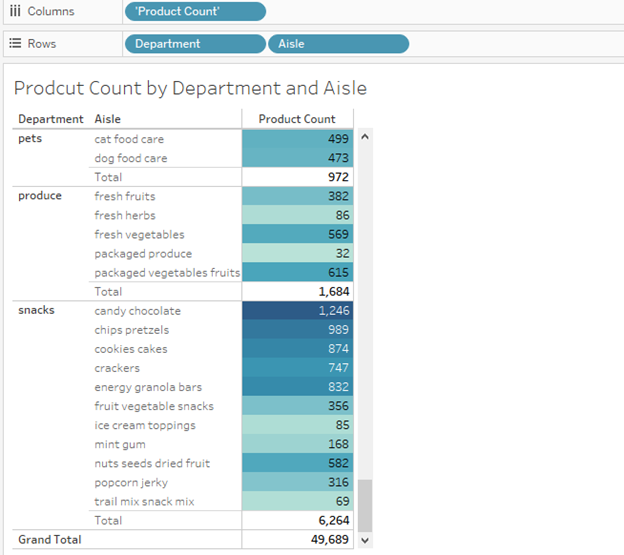



There are a total of 49689 products , with the maximum being in Department Personal Care with 6564 products

### Top 10 Famous Departments among customers

top_product_cnt=15
customerscount= recommendproddep.groupby("department")["user_id"].aggregate("count").sort_values(ascending=False)[:top_product_cnt]
customerscount.plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Top 10 Famous Departments among customers")
plt.show()

Top 3 Famous Departments among customers are :
- Produce
- dairy eggs
- snacks

This indicates that Instacart is most popular for its Produce Department which deals in fresh vegetables and fruits

### Aisle Details for the most popular Departments


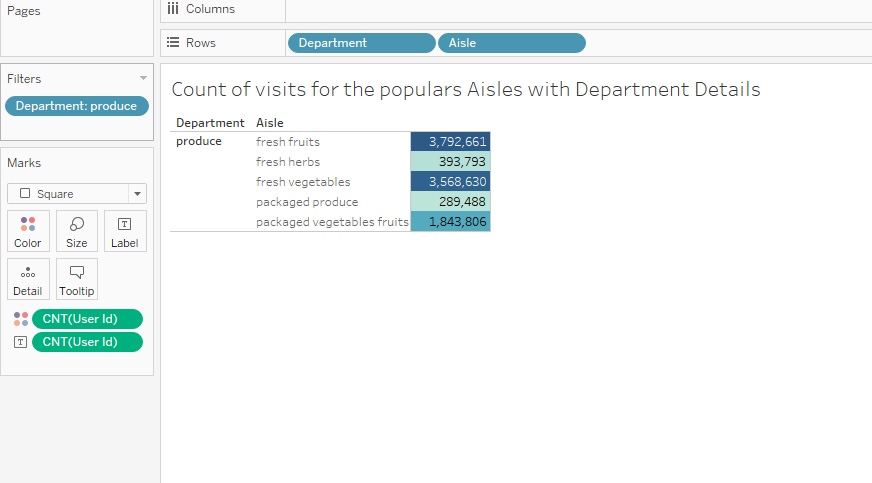

From this visualization it can be analyzed that the most popular Aisles are Fresh Fruits and Fresh Herbs in the Produce Department

### Top 15 Famous Aisles among customers

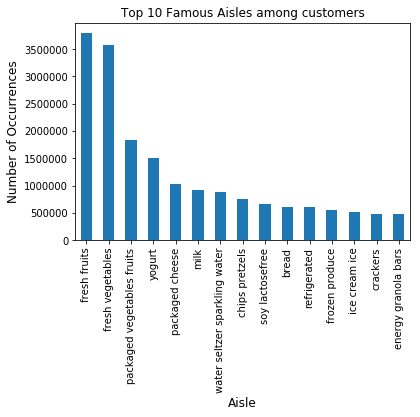

In [67]:
cnt_group = recommendproddep.groupby("aisle")["user_id"].aggregate("count").sort_values(ascending=False)[:top_product_cnt]
cnt_group.plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Top 10 Famous Aisles among customers")
plt.show()

Top 3 Famous Aisles among customers are :
    - Fresh Fruits
    - Fresh Vegetables
    - Packaged Vegetables Fruits
    
 From the above visualization we observe that most popular aisle also belongs to the most popular Department - Produce

### Top 10 Famous Products among customers

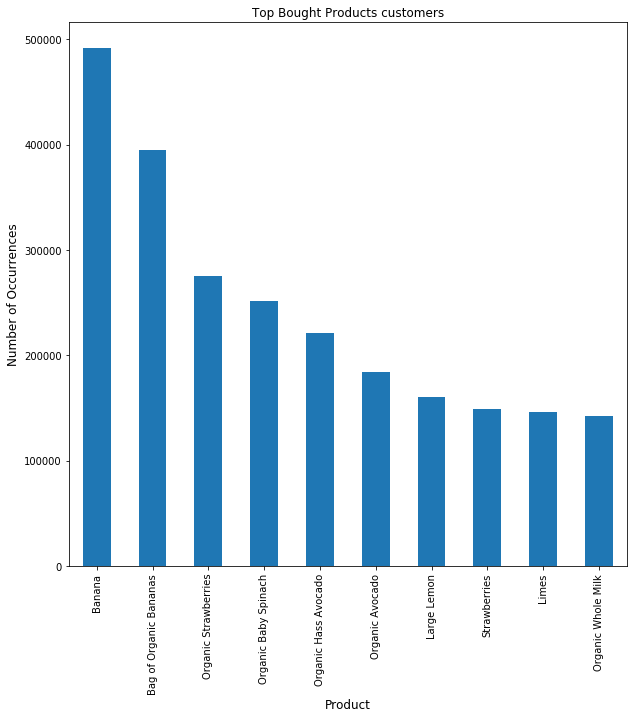

In [50]:
cnt_product_users = recommendproddep.groupby("product_name")["user_id"].aggregate("count").sort_values(ascending=False)[:10]
plt.figure(figsize=(10,10))
cnt_product_users.plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.title('Top Bought Products customers')
plt.xticks(rotation='vertical')
plt.show()

### Among the top 10 products most popular products Banana , Bag of Organic Bananas Organic Strawberries.

Additionally , they also belong to the most popular department and most popular aisle

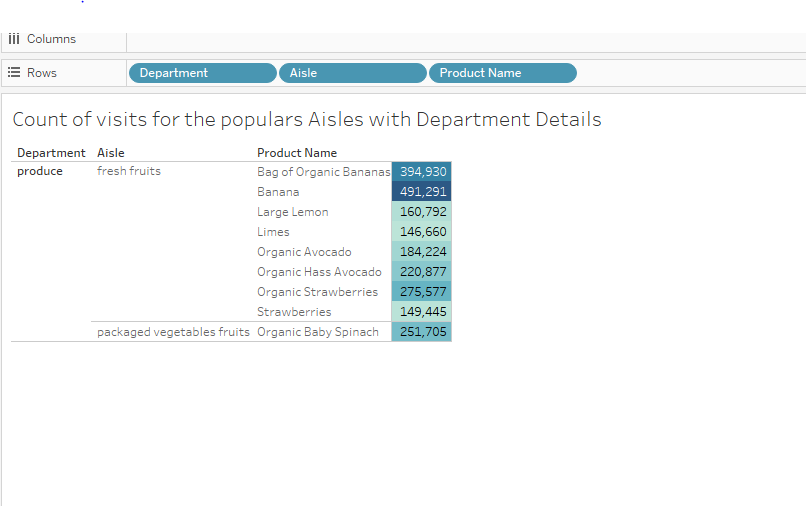

## Checking the number of times a product is bought  

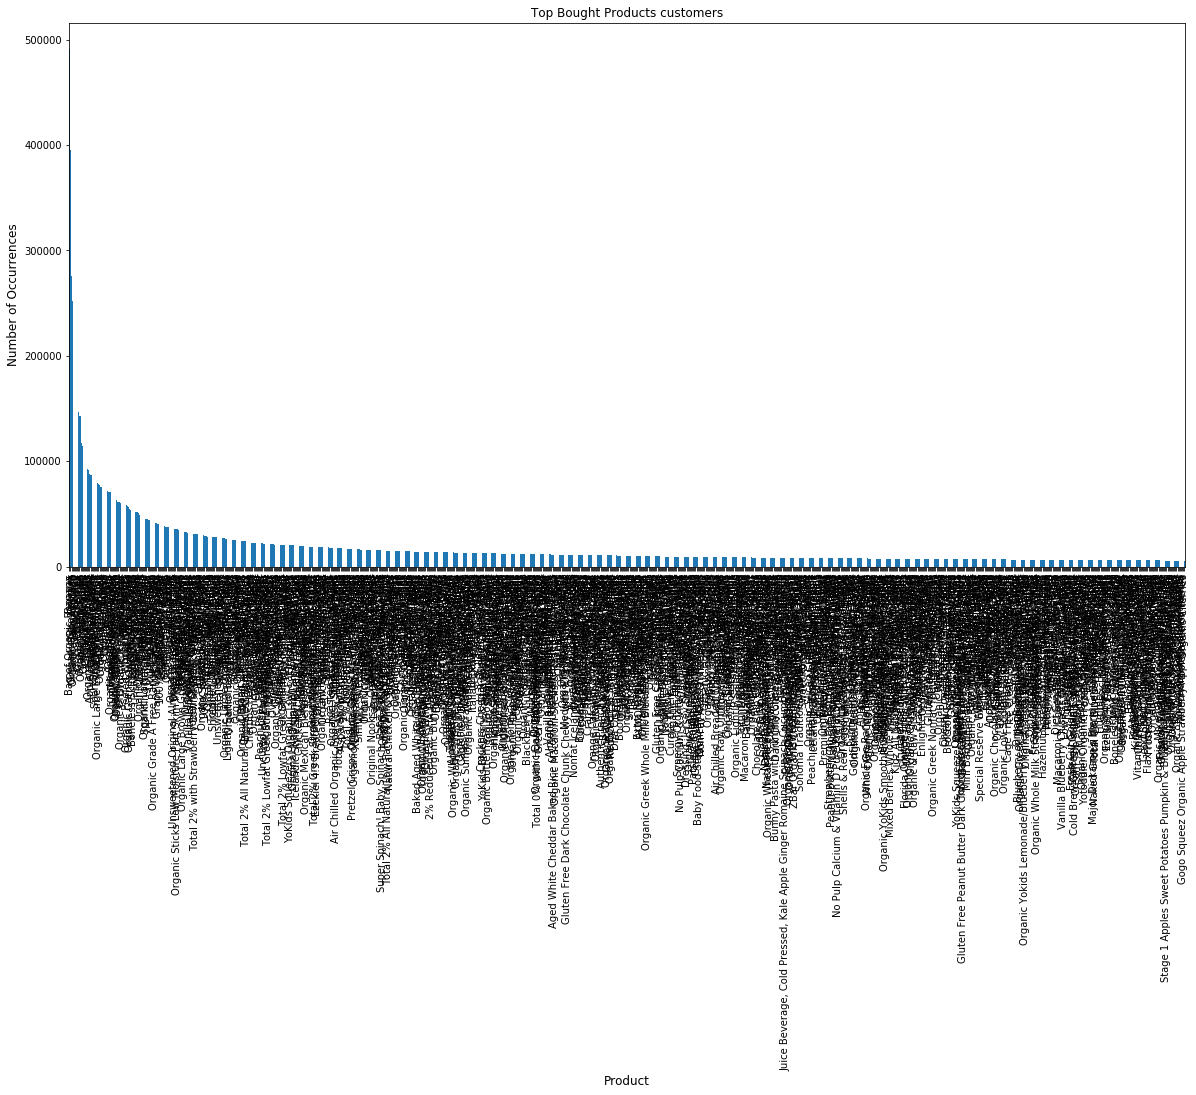

In [62]:
cnt_product_users = recommendproddep.groupby("product_name")["user_id"].aggregate("count").sort_values(ascending=False)[:1000]
plt.figure(figsize=(20,10))
cnt_product_users.plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.title('Top Bought Products customers')
plt.xticks(rotation='vertical')
plt.show()

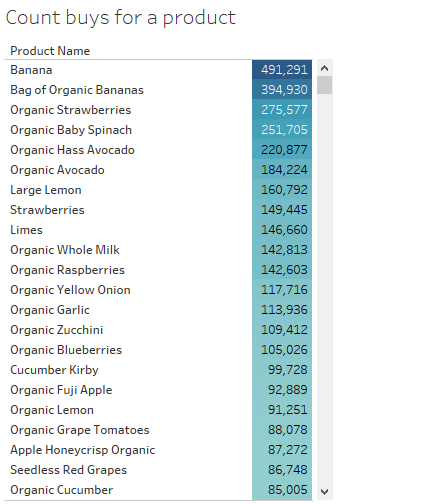

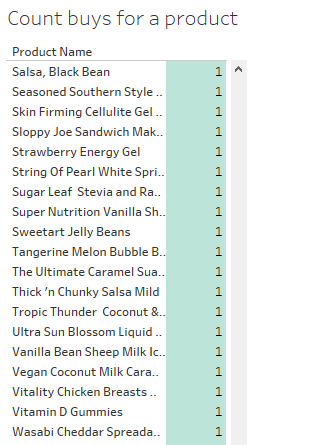






### From this we can see that some of the products are not bought a lot and some have huge sales this can help us reduce the set of products we need for recommendation

### Customers with maximum number of products ordered

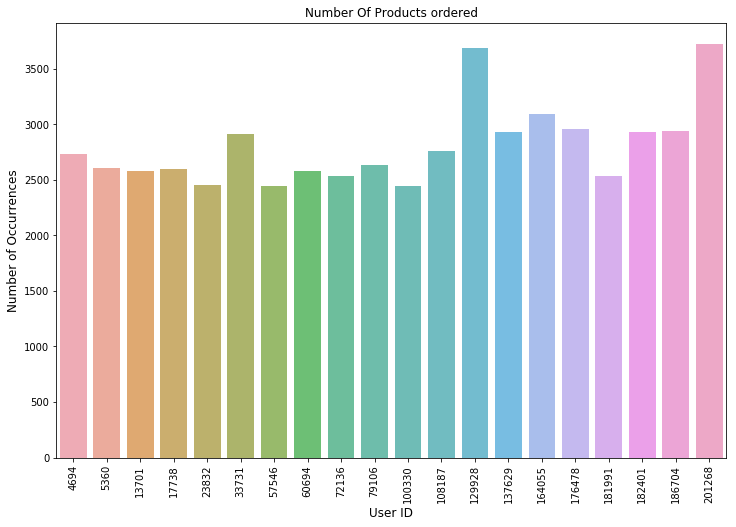

In [71]:
ocpu = recommendproddep.groupby("user_id")["product_id"].aggregate('count').sort_values(ascending=False)[:20]
plt.figure(figsize=(12,8))
sns.barplot(ocpu.index, ocpu.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('User ID', fontsize=12)
plt.title("Number Of Products ordered")
plt.xticks(rotation='vertical')
plt.show()

#### Result : We Observe that userid 201268 has purchased the most number products , followed by userid 12998

### Maximum Orders per customers

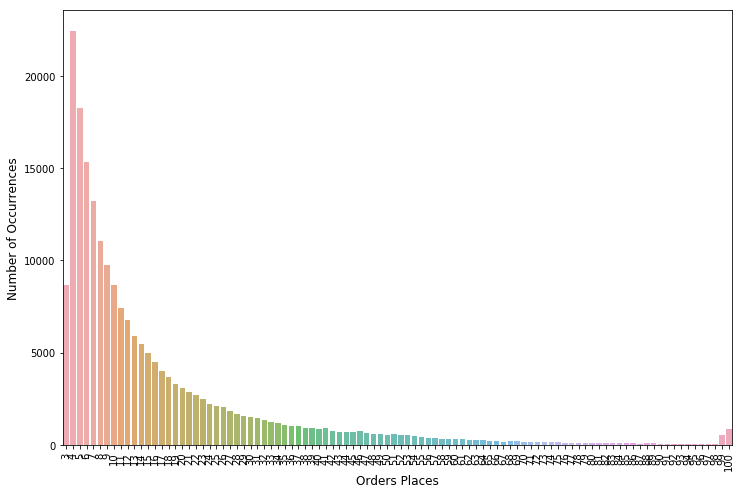

In [3]:
cnt_srs = recommendproddep.groupby("user_id")["order_number"].aggregate(np.max).sort_values(ascending=False).reset_index()
cnt_srss = cnt_srs.order_number.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srss.index, cnt_srss.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Orders Places', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

#### There are no orders less than 3 and the max order number is 100 of a customer
#### Also Most of the users had orders between 3-6

## Most products bought in an order by day of the week by a particluar user

In [5]:
ocpua = recommendproddep.groupby(["user_id","order_dow"])["order_id"].aggregate('count').sort_values(ascending=False)[:20].reset_index()
print(ocpua)


    user_id  order_dow  order_id
0    176478          1      2424
1     17738          1      2076
2    134433          5      1785
3     64719          1      1735
4    160106          0      1718
5     97899          1      1688
6    129928          1      1643
7      5360          1      1553
8     39901          5      1523
9     88996          5      1512
10    74798          4      1384
11    30910          5      1362
12   169647          4      1334
13   199743          5      1298
14   150186          5      1272
15     4694          2      1268
16    45520          1      1264
17   102282          6      1250
18   181991          1      1232
19      290          6      1212


### Most products were bought in orders purchased on Sunday. This table might also suggest that users purchase more products on a particular day of the week

### Trend of Maximum Products bought by Day Of The Week


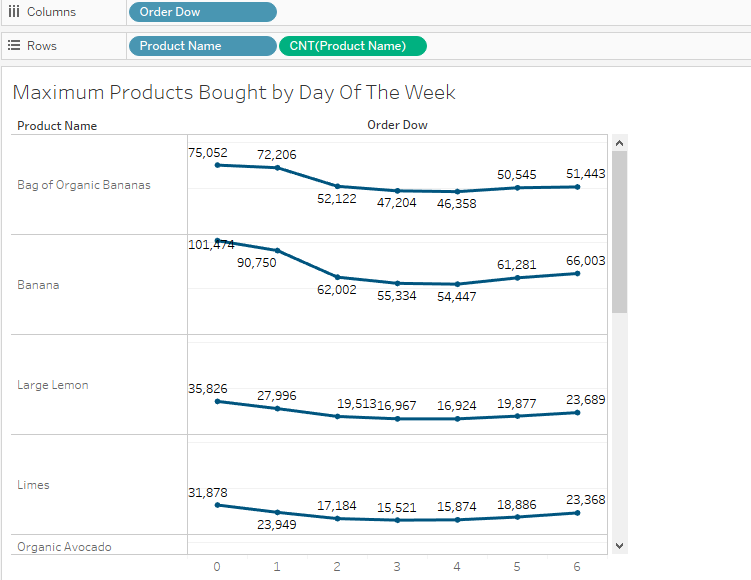

#### Most of the popular products are bought on Sunday. The Trend depicts they are bought the most from Sunday to Wednesday with a slight dip in purchase for the rest of the week

### Unique orders placed by department

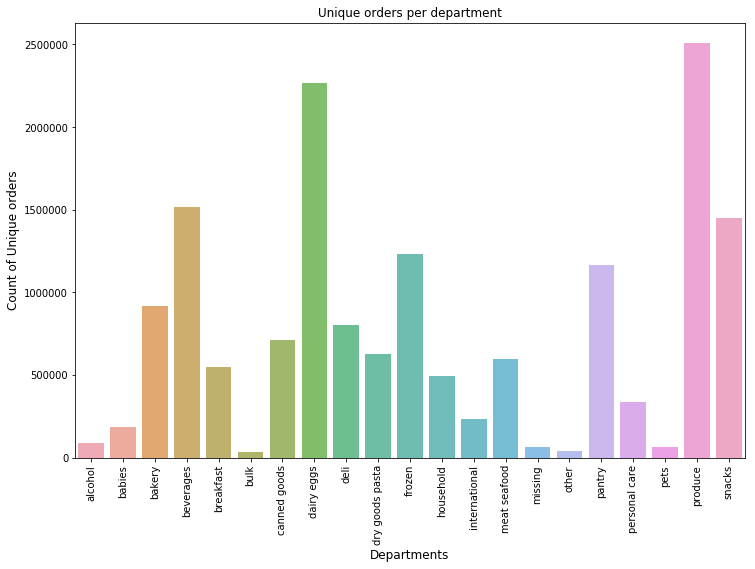

In [6]:
ordersperdept=recommendproddep.groupby("department")["order_id"].apply(lambda x: len(x.unique())).reset_index()
ordersperdept.rename(columns={'order_id':'Count'},inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(ordersperdept['department'],ordersperdept['Count'], alpha=0.8)
plt.ylabel('Count of Unique orders', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.title('Unique orders per department')
plt.xticks(rotation='vertical')
plt.show()


### Conclusion: We can clearly see that some departments have really infrequent sales 
### This helps us to decide the clustering as well as eliminate some of the departments from recommending 

### Departmentwise Distribution of Sales

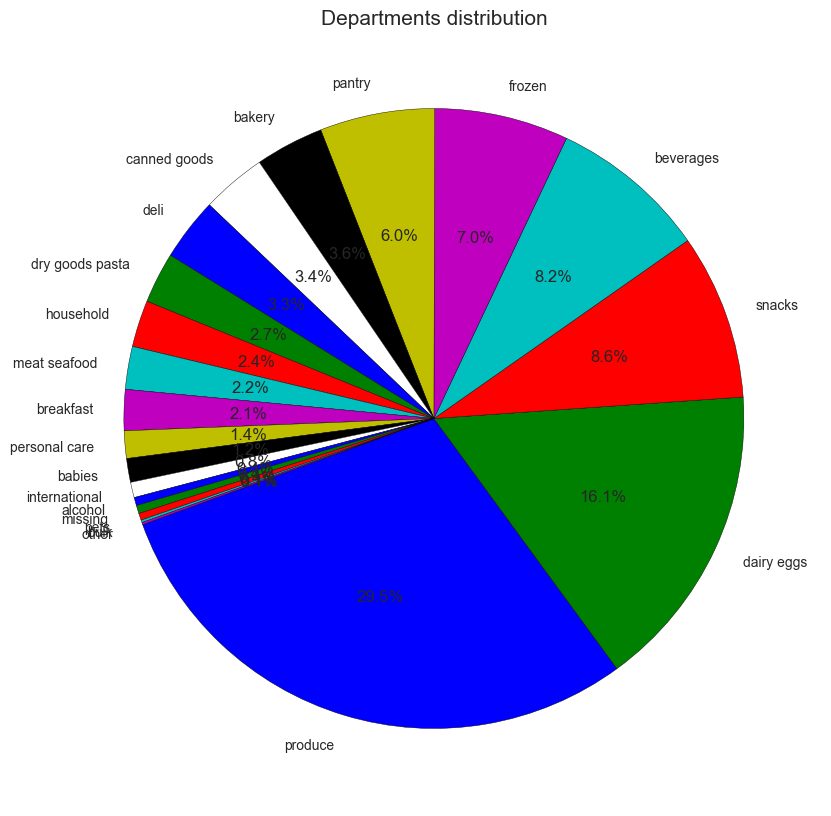

In [210]:
## The code for the plot was taken  from Kaggle kernel
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart

plt.figure(figsize=(10,10))
temp_series = recommendproddep['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

A Heat Map representation

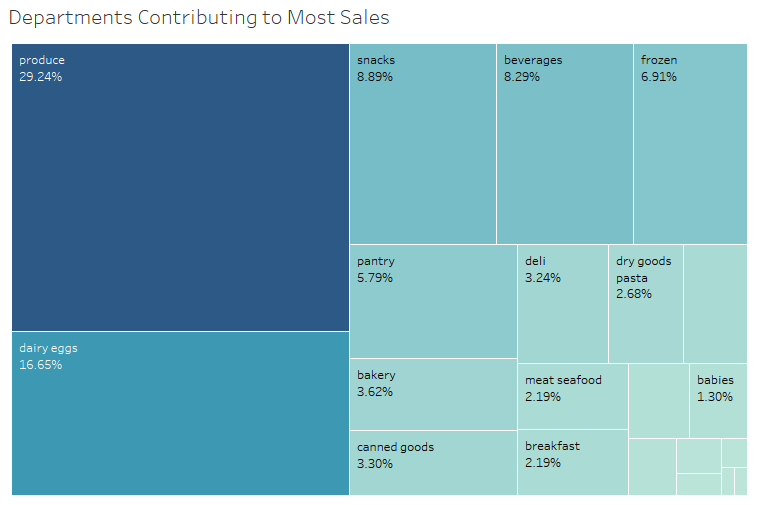



#### This plot gives us a percentage distribution of sales on basis of department
#### produce,snacks and dairy eggs contribute to almost 50% transactions . This is an expected result as the the top department is Produce.

### Best Selling Aisles in each Department (number of Orders)

### How Many Times any Product is ordered(with the department name and aisle to which the product belong)?

product_name                          department  aisle                     
Banana                                produce     fresh fruits                  8476644
Bag of Organic Bananas                produce     fresh fruits                  8071203
Organic Strawberries                  produce     fresh fruits                  4884244
Organic Baby Spinach                  produce     packaged vegetables fruits    4412435
Organic Hass Avocado                  produce     fresh fruits                  4291905
Organic Raspberries                   produce     packaged vegetables fruits    3107921
Large Lemon                           produce     fresh fruits                  2862480
Organic Avocado                       produce     fresh fruits                  2856520
Organic Whole Milk                    dairy eggs  milk                          2844206
Strawberries                          produce     fresh fruits                  2639733
Limes                                 produ

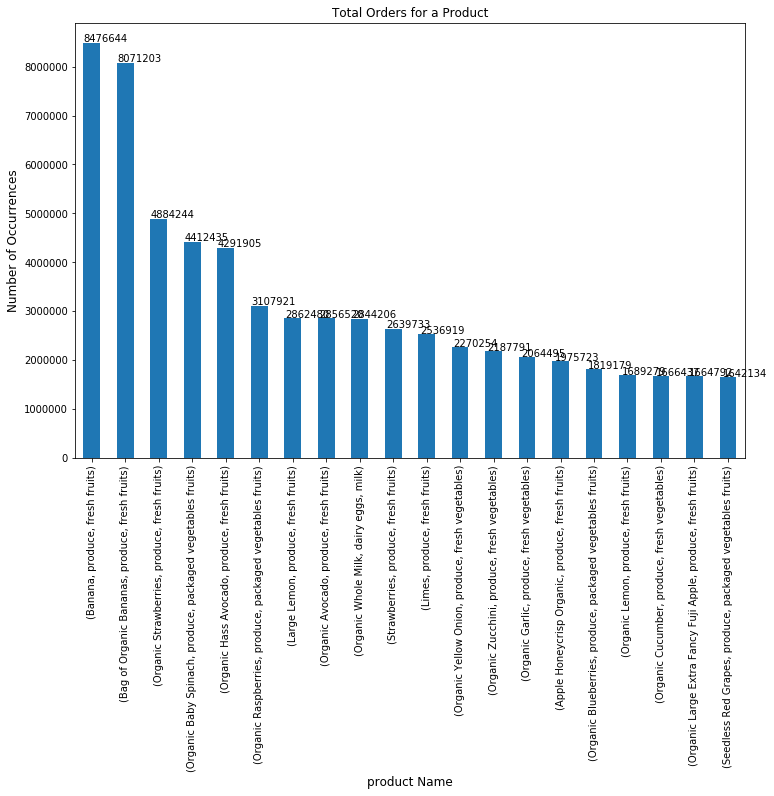

In [13]:
total_orders_for_product=recommendproddep.groupby(["product_name","department","aisle"])['order_number'].aggregate("sum").sort_values(ascending=False)[:20]
print(total_orders_for_product)
plt.figure(figsize=(12,8))
ax = total_orders_for_product.plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('product Name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Total Orders for a Product')
plt.show()

### This Summary Metric gives a hollistic view of the maximum bought product

### Frequency of Day of week Vs Hour of day for Order Id

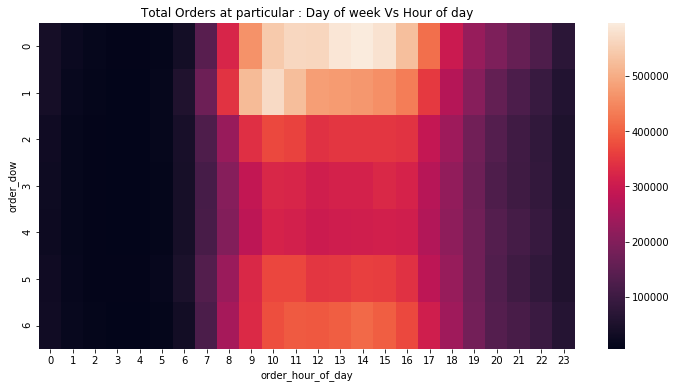

In [14]:
grouped_df = recommendproddep.groupby(["order_dow", "order_hour_of_day"])["order_id"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_id')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Total Orders at particular : Day of week Vs Hour of day")
plt.show()

### We can see very few orders are place before 8 am and most of the orders are done on Saturday and Sunday from 9 am to 5 pm
- Saturday Evenings 
- Sunday Mornings  are the prime time for the customer orders. 
This helps us understand that customers predominantly purchase on the weekends

## Percentage of Orders on Weekends vs Total Orders

In [35]:
weekend_orders =recommendproddep.groupby(["order_dow"])["order_number"].aggregate("sum").reset_index()
weekend_orders["order_dow"].values[5]
weekend_orders_percent[0]=float(weekend_orders["order_number"].values[0])/float(recommendproddep['order_number'].sum())*100
weekend_orders_percent[1]=float(weekend_orders["order_number"].values[1])/float(recommendproddep['order_number'].sum())*100
print("Percentage of Orders on Saturday : ",weekend_orders_percent[0])
print("Percentage of Orders on Sunday ",weekend_orders_percent[1])

('Percentage of Orders on Saturday : ', 18.143811129851485)
('Percentage of Orders on Sunday ', 17.469173446161843)


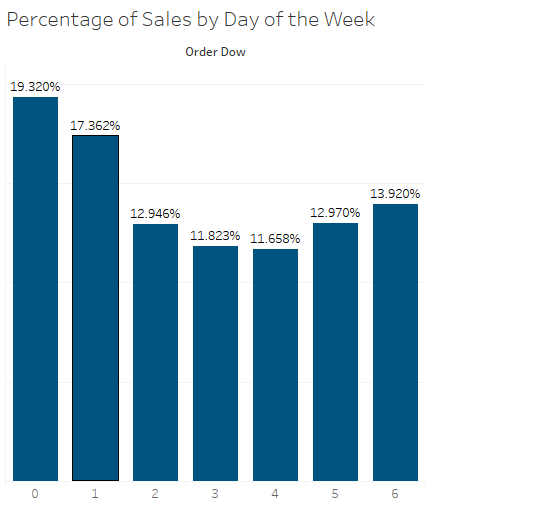






### More than 35% of orders are placed in just two days
### This summary metric can help instacart on their restocking capability

## Percentage of ReOrders on Weekends vs Total ReOrders

In [39]:
product_total= recommendproddep.groupby("order_dow")["reordered"].aggregate({'reorder_sum': sum,'reorder_total': 'count'}).reset_index()
product_total["order_dow"].values
product_total['Probability of being Reordered'] = product_total['reorder_sum']/ product_total['reorder_total']
print("Probability of ReOrders on Saturday : ",product_total['Probability of being Reordered'].values[0])
print("Probability of ReOrders on Sunday : ",product_total['Probability of being Reordered'].values[1])
print("Probability of ReOrders on Monday : ",product_total['Probability of being Reordered'].values[2])
print("Probability of ReOrders on Tuesday : ",product_total['Probability of being Reordered'].values[3])
print("Probability of ReOrders on Wednesday : ",product_total['Probability of being Reordered'].values[4])
print("Probability of ReOrders on Thursday : ",product_total['Probability of being Reordered'].values[5])


c:\python27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


('Probability of ReOrders on Saturday : ', 0.58648310939664738)
('Probability of ReOrders on Sunday : ', 0.60367186810798812)
('Probability of ReOrders on Sunday : ', 0.58971989512054745)
('Probability of ReOrders on Sunday : ', 0.58628940167032717)
('Probability of ReOrders on Sunday : ', 0.59112343432006931)
('Probability of ReOrders on Sunday : ', 0.59590150835198363)


### We can see that their is a 60% chance of reordering the product this gives us an idea of how many products must be displayed for restocking

## Percentage of ReOrders vs Total ReOrders Per Users


In [42]:
user_total= recommendproddep.groupby("user_id")["reordered"].aggregate({'reorder_sum': sum,'reorder_total': 'count'}).reset_index()
user_total['Probability of being Reordered by Users'] = user_total['reorder_sum']/ user_total['reorder_total']
print(user_total['Probability of being Reordered by Users'].tail(10))


c:\python27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


206199    0.654362
206200    0.569307
206201    0.626263
206202    0.356061
206203    0.203704
206204    0.274510
206205    0.473684
206206    0.587444
206207    0.707533
206208    0.474453
Name: Probability of being Reordered by Users, dtype: float64


### Using this we can get the chances of reordering on the basis of user
### We upload this data as csv and use it for recommending

### Number of Times any Product is Re-ordered(with the department name and aisle to which the product belong)?

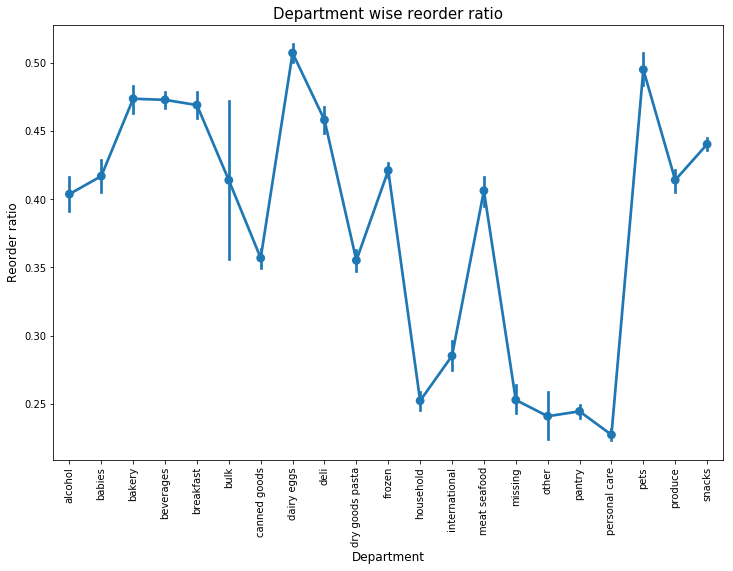

In [44]:
total_reorders_for_product = recommendproddep.groupby(["department","aisle","product_name"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(total_reorders_for_product['department'].values, total_reorders_for_product['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Using this we can use this data on department clustered recommendation algorithm and make amount of predictions accordingly. As per the above result the probability of Reorders is the highest for the Department Produce

### Product with highest percentage of being Reordered

In [50]:
product_total= recommendproddep.groupby("product_name")["reordered"].aggregate({'reorder_sum': sum,'reorder_total': 'count'}).reset_index()
product_total['Probability of being Reordered'] = product_total['reorder_sum'] / product_total['reorder_total'] 
print(product_total[product_total['Probability of being Reordered']>=0.9])
#print(product_total.product_name,product_total['Probability of being Reordered'])

c:\python27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


                                   product_name  reorder_sum  reorder_total  \
8537                         Chocolate Love Bar           94            102   
13844                 Energy Shot, Grape Flavor           20             22   
28415                       Orange Energy Shots           12             13   
37379                       Raw Veggie Wrappers           65             69   
38793   Russian River Valley Reserve Pinot Noir           27             30   
39870  Serenity Ultimate Extrema Overnight Pads           84             90   
40458          Simply Sleep Nighttime Sleep Aid           41             45   
41723                 Soy Powder Infant Formula           32             35   

       Probability of being Reordered  
8537                         0.921569  
13844                        0.909091  
28415                        0.923077  
37379                        0.942029  
38793                        0.900000  
39870                        0.933333  
40458   

#### Conclusion: Using this we get the list of products which have the maximum probability of being reordered. As here this oservation probabilyt of the Chocolate Ba being reordered is the maximum as it has been reordered the most

### Reorder ratio by : Order of Day Vs Order Of Week:

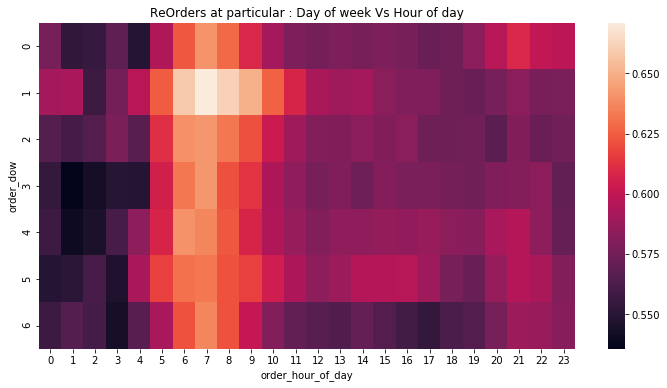

In [51]:
reorderedratio = recommendproddep.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
reorderedratio  = reorderedratio .pivot('order_dow', 'order_hour_of_day', 'reordered')
plt.figure(figsize=(12,6))
sns.heatmap(reorderedratio )
plt.title("ReOrders at particular : Day of week Vs Hour of day")
plt.show()

#### Result : This indicates that maximum reorders have occured 6 am to 8 am on all days with the maximum being on Sunday

### Finding the maximum bought product for that day of week

In [52]:
maxproddow=recommendproddep[['product_id','order_dow','product_name']].groupby(recommendproddep['order_dow']).max()
maxproddow

,product_id,order_dow,product_name
order_dow,,,
0,49688,0,with a Splash of Pineapple Coconut Water
1,49688,1,with a Splash of Pineapple Coconut Water
2,49688,2,with a Splash of Pineapple Coconut Water
3,49688,3,with a Splash of Pineapple Coconut Water
4,49688,4,with a Splash of Pineapple Coconut Water
5,49688,5,with a Splash of Pineapple Coconut Water
6,49688,6,with a Splash of Pineapple Coconut Water


### Finding the maximum bought product for that hour of day

In [53]:
maximumboughtprohour=recommendproddep[['product_id']].groupby(recommendproddep['order_hour_of_day']).max()
maximumboughtprohour

,product_id
order_hour_of_day,
0,49686
1,49686
2,49683
3,49683
4,49688
5,49686
6,49687
7,49688
8,49688


## Count of Type of Set in Evaluation Set

In [54]:
values_counts_inorders=recommendproddep.eval_set.value_counts()
print(values_counts_inorders)
#orders_df.order_hour_of_day.values

prior    32434489
train     1384617
Name: eval_set, dtype: int64


Count of Rows in Each Evaluation Set:
1. prior: 32424489
2. train: 1384617
Below is the Graph Representation of the above values.


### Count of rows in each Evaluation set

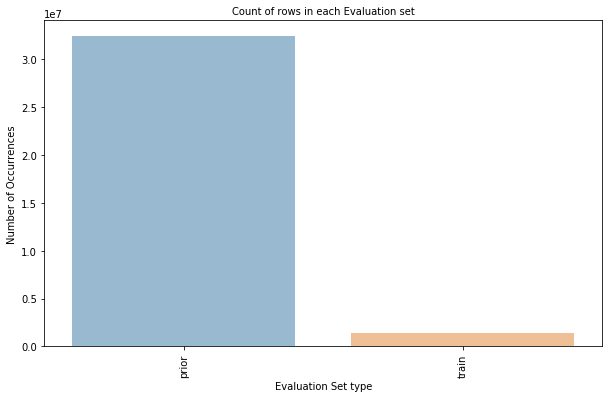

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(values_counts_inorders.index, values_counts_inorders.values, alpha=0.5)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Evaluation Set type', fontsize=10)
plt.title('Count of rows in each Evaluation set', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

### Number Of Users by Days of the week

In [56]:
cnt_sr1=recommendproddep.groupby("order_dow").agg({"user_id": pd.Series.nunique}).reset_index()
print(cnt_sr1)


   order_dow  user_id
0          0   149694
1          1   155758
2          2   144571
3          3   139743
4          4   136719
5          5   138364
6          6   132612


The above observation tells the unique customers is maximum in Day 0 : Saturday and Day 1 : Sunday 

Majority of the Order is Placed in the Day time hours

## Count Of Products Ordered on Day Of Week

0    6533692
1    5871834
6    4707583
5    4386443
2    4378360
3    3998498
4    3942696
Name: order_dow, dtype: int64


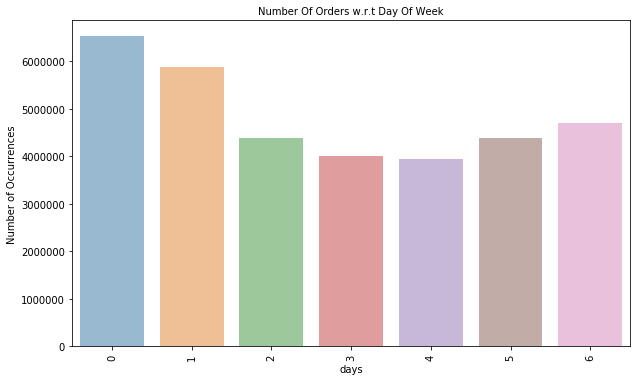

In [57]:
values_counts_day=recommendproddep.order_dow.value_counts()
print(values_counts_day)
plt.figure(figsize=(10,6))
sns.barplot(values_counts_day.index, values_counts_day.values, alpha=0.5)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('days', fontsize=10)
plt.title('Number Of Orders w.r.t Day Of Week', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

Majority of the orders are placed on Day 0 and Day 1 , that is Saturday and Sunday and the least number of orders were placed on Wednesdays.

## Count Of Days_since_prior_order

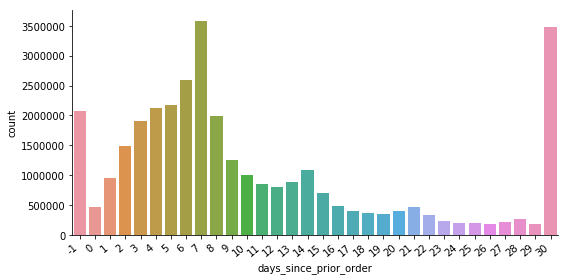

In [58]:
plt.figure(figsize=(8,4)) 
ax=sns.countplot(x='days_since_prior_order', data=recommendproddep)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine()
plt.tight_layout()
plt.show()

We can see that customers order maximum once in every week or every month , after a sudden fall in customers order after 7 days, at 14 and 21 days gain there is a little small peak in comparison to rest of the other days.

### Count of Weekly Orders - Count of Order Number

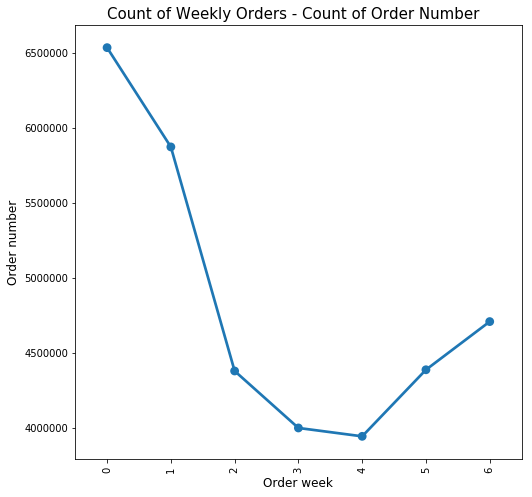

In [60]:

grouped_df =recommendproddep.groupby(["order_dow"])["order_number"].aggregate("count").reset_index()

plt.figure(figsize=(8,8))
sns.pointplot(grouped_df["order_dow"].values, grouped_df["order_number"].values, alpha=0.8)
plt.ylabel('Order number', fontsize=12)
plt.xlabel('Order week', fontsize=12)
plt.title("Count of Weekly Orders - Count of Order Number  ", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Maximum Ratio of Weekly Orders - Count of Order Number is on :
    - Saturday
    - Sunday
    
    


### Hourly Orders - Count of Order Number

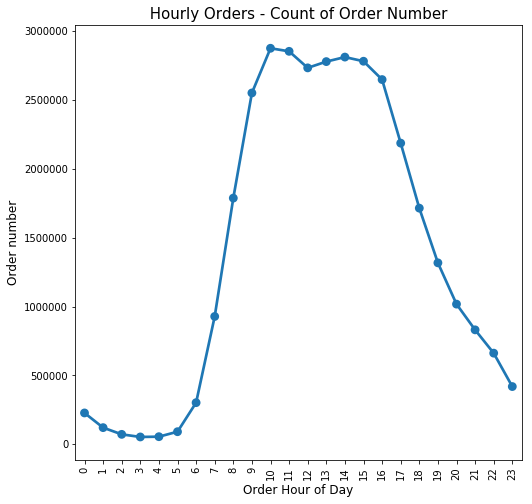

In [61]:

hour_df = recommendproddep.groupby(["order_hour_of_day"])["order_number"].aggregate("count").reset_index()

plt.figure(figsize=(8,8))
sns.pointplot(hour_df["order_hour_of_day"].values, hour_df["order_number"].values, alpha=0.8)
plt.ylabel('Order number', fontsize=12)
plt.xlabel('Order Hour of Day', fontsize=12)
plt.title(" Hourly Orders - Count of Order Number ", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Maximum Ratio of Weekly Orders - Count of Order Number is between :
    - 11:00 am and 17:00 pm hours of the day

## Orders_product_prior with reordered items

In [75]:
# percentage of Re-orders in prior set #
total_reordered=(x.reordered.sum().astype('float32')/recommendproddep.shape[0] )*100
print(total_reordered)

62.8692735253


62 % of the items are reordered in the combined set

19955360 values are reordered in combined dataset

## TOP 20 Department with their respective aisle and products which are ordered

In [62]:
top_product_cnt =20
recommendproddep.groupby(["department","aisle","product_name"])["order_id"].aggregate("count").sort_values(ascending=False)[:top_product_cnt]

department  aisle                       product_name            
produce     fresh fruits                Banana                      491291
                                        Bag of Organic Bananas      394930
                                        Organic Strawberries        275577
            packaged vegetables fruits  Organic Baby Spinach        251705
            fresh fruits                Organic Hass Avocado        220877
                                        Organic Avocado             184224
                                        Large Lemon                 160792
                                        Strawberries                149445
                                        Limes                       146660
dairy eggs  milk                        Organic Whole Milk          142813
produce     packaged vegetables fruits  Organic Raspberries         142603
            fresh vegetables            Organic Yellow Onion        117716
                                   

#### Maximum Number of Orders are being placed with :

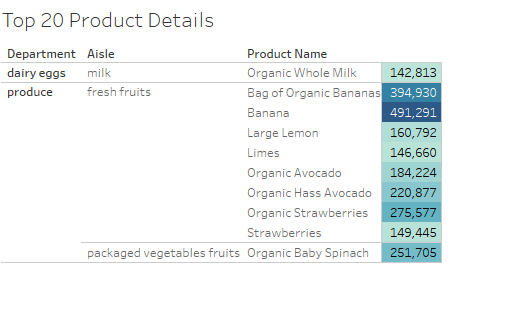
    - Department : Produce 
        - Aisle1: Fresh Fruits 
            - List of Product Name in this subcategory is: 
                - Banana
                - Bag of Organic Bananas
                - Organic Strawberries        
        - Aisle 2 : packaged vegetables fruits  
            - 1st List of Product Name in this subcategory is:
                - Organic Baby Spinach
        - Aisle 3 : Fresh fruits                
                - Organic Hass Avocado        
                - Organic Avocado             
                - Large Lemon                 
                - Strawberries                

## TOP 20 Departments where order was placed

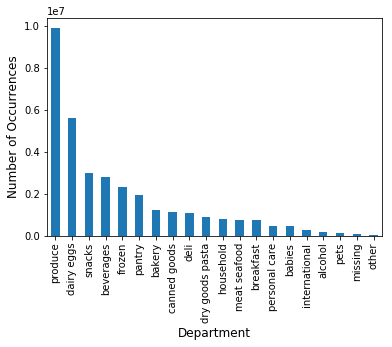

In [63]:
recommendproddep.groupby(["department"])["order_id"].aggregate("count").sort_values(ascending=False)[:top_product_cnt].plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('')
plt.show()

Produce has most orders placed. Making itthe most most popular department

## TOP 20 Aisles where order was placed

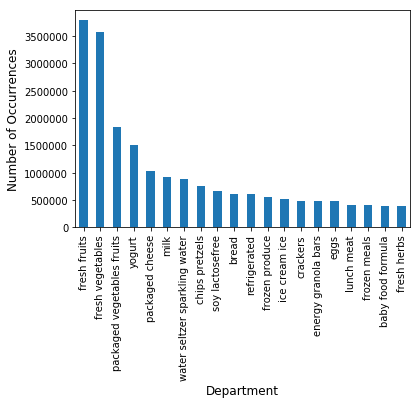

In [64]:
recommendproddep.groupby(["aisle"])["order_id"].aggregate("count").sort_values(ascending=False)[:top_product_cnt].plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## TOP 20 Products which are ordered

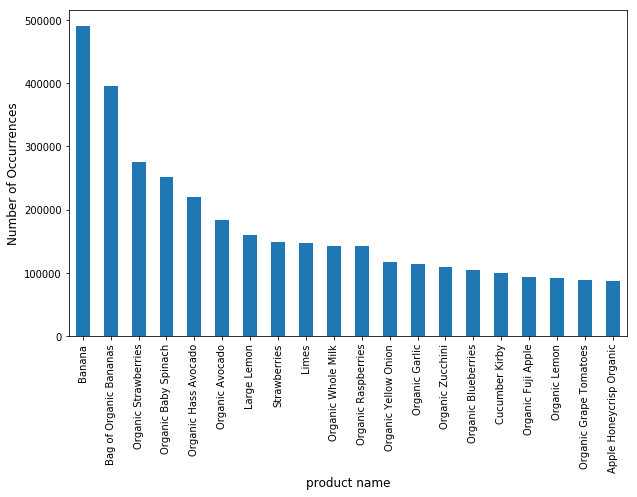

In [5]:
top_product_cnt =20
plt.figure(figsize=(10,6))
maximum =recommendproddep.groupby("product_name").count()["order_id"].sort_values(ascending=False)[:top_product_cnt].plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('product name', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Most reordered product with their department and aisle

In [6]:
product_order = recommendproddep.groupby(["product_name","department","aisle"])["reordered"].aggregate("count").sort_values(ascending=False)[:top_product_cnt].reset_index()
print(product_order)

                product_name  department                       aisle  \
0                     Banana     produce                fresh fruits   
1     Bag of Organic Bananas     produce                fresh fruits   
2       Organic Strawberries     produce                fresh fruits   
3       Organic Baby Spinach     produce  packaged vegetables fruits   
4       Organic Hass Avocado     produce                fresh fruits   
5            Organic Avocado     produce                fresh fruits   
6                Large Lemon     produce                fresh fruits   
7               Strawberries     produce                fresh fruits   
8                      Limes     produce                fresh fruits   
9         Organic Whole Milk  dairy eggs                        milk   
10       Organic Raspberries     produce  packaged vegetables fruits   
11      Organic Yellow Onion     produce            fresh vegetables   
12            Organic Garlic     produce            fresh vegeta

Top 10 products with their aisle and department which are being reordered are :
 Banana     produce                fresh fruits   
1     Bag of Organic Bananas     produce                fresh fruits   
2       Organic Strawberries     produce                fresh fruits   
3       Organic Baby Spinach     produce  packaged vegetables fruits   
4       Organic Hass Avocado     produce                fresh fruits   
5            Organic Avocado     produce                fresh fruits   
6                Large Lemon     produce                fresh fruits   
7               Strawberries     produce                fresh fruits   
8                      Limes     produce                fresh fruits   
9        Organic Raspberries     produce  packaged vegetables fruits   
10        Organic Whole Milk  dairy eggs                        milk 

## Name of Top 20 Products ordered on the basis of their count and Product Id: 

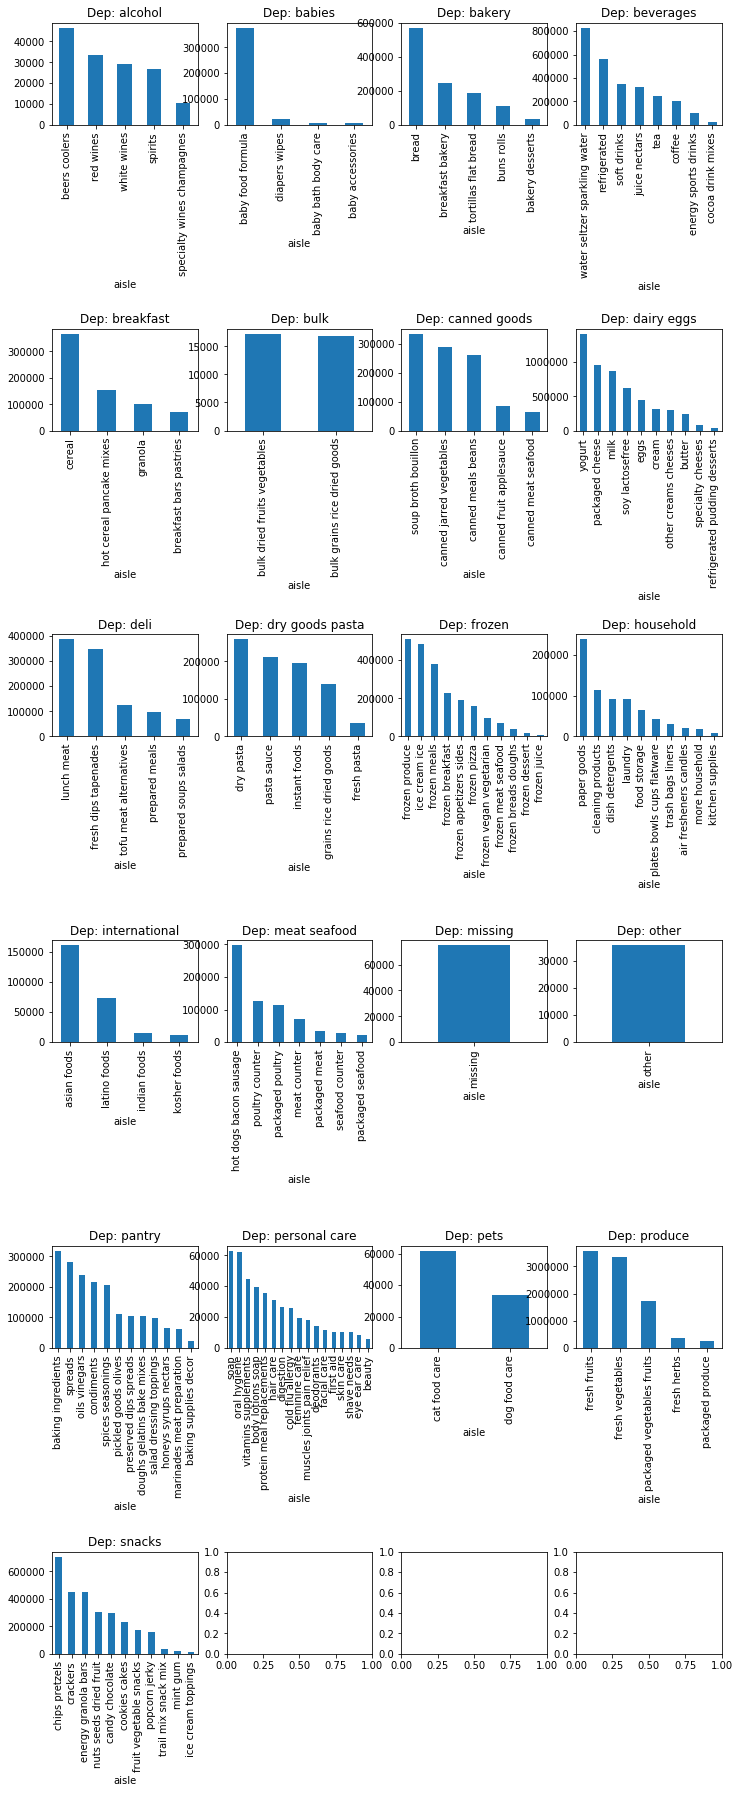

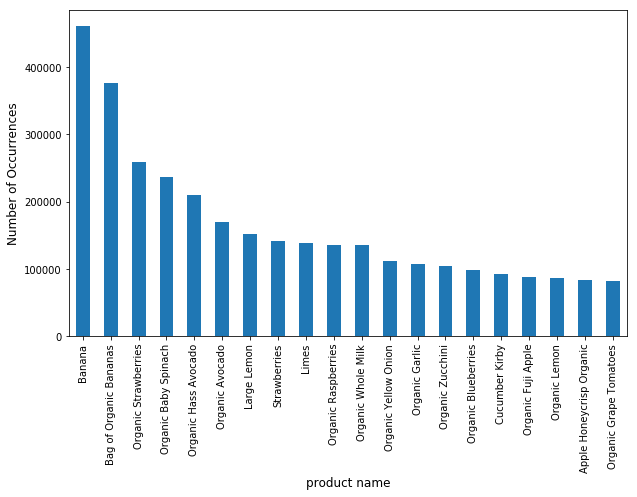

In [84]:
top_product_cnt =20
plt.figure(figsize=(10,6))
maximum =recommendproddep.groupby("product_name").count()["product_id"].copy().sort_values(ascending=False)[:top_product_cnt].plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('product name', fontsize=12)

plt.xticks(rotation='vertical')
plt.show()

Name of Top 2 Products ordered are : Banana and Bag Of Organic Bananas ..!


## Maximum Orders per Order ID added to Cart

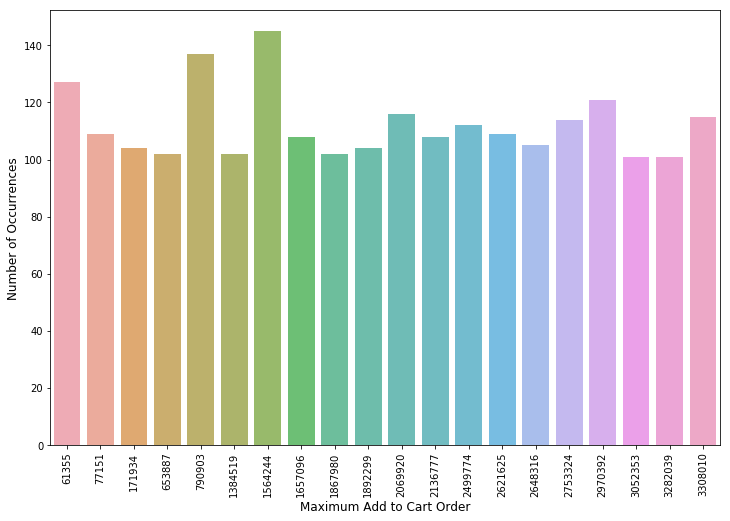

In [7]:
cnt_x = recommendproddep.groupby("order_id")["add_to_cart_order"].aggregate(np.max).sort_values(ascending=False)[:top_product_cnt].reset_index()
plt.figure(figsize=(12,8))
sns.barplot(cnt_x["order_id"], cnt_x["add_to_cart_order"], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum Add to Cart Order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Maximum Add to Cart Order are :
 - Order Number 1564244
 - Order Number 790903

## Maximum Products added to Cart

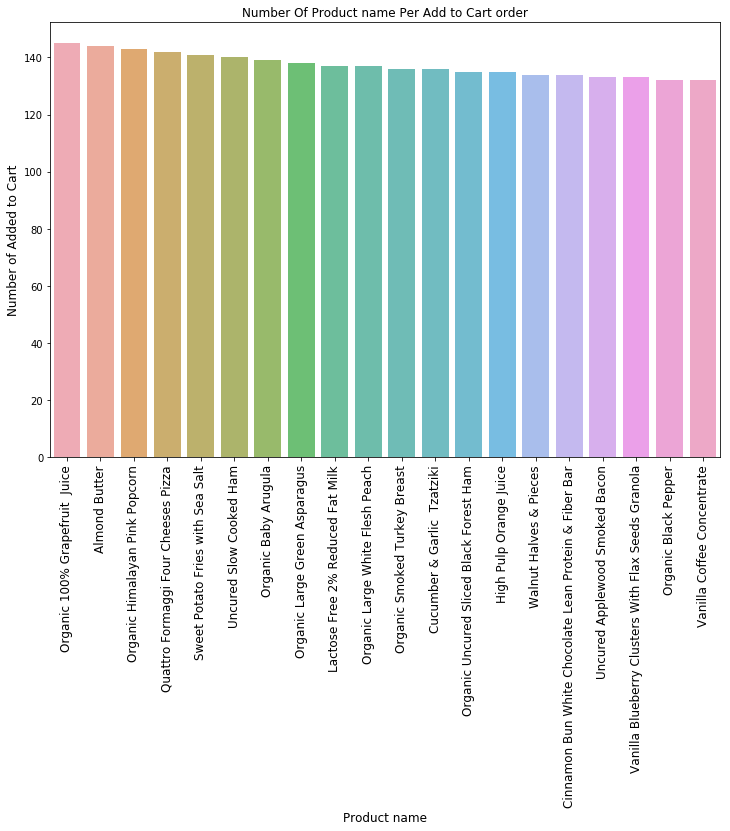

In [86]:
cnt_prod = recommendproddep.groupby("product_name")["add_to_cart_order"].aggregate(np.max).sort_values(ascending=False)[:top_product_cnt].reset_index()
plt.figure(figsize=(12,8))
sns.barplot(cnt_prod["product_name"], cnt_prod["add_to_cart_order"], alpha=0.8)
plt.ylabel('Number of Added to Cart', fontsize=12)
plt.xlabel('Product name', fontsize=12)
plt.title("Number Of Product name Per Add to Cart order")
plt.xticks(rotation='vertical',fontsize=12)
plt.show()

Product Names:  Organic 100% Grapefruit Juice, Almond Butter, Organic Himalayan Pink Popcorn are maximum added to cart